In [1]:
import cv2
import numpy as np
import csv
import os
import sklearn
import matplotlib.pyplot as plt
from IPython.display import SVG
from keras.utils import np_utils
%matplotlib inline

Using TensorFlow backend.


In [2]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential, Model
from keras.layers.core import Dense, Activation, Flatten, Lambda, Dropout
from keras.layers.convolutional import Convolution2D, Cropping2D
from keras.activations import relu
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization

In [3]:
def get_samples(dirname):
    samples = []
    filename1 = dirname + '/driving_log.csv'
    with open(filename1) as csvfile:
        reader = csv.reader(csvfile)
        for line in reader:
            line.append(dirname)
            samples.append(line)
    samples = samples[1:]
    return samples

In [4]:
dirname_udacity = 'udacity/data'
dirname_recover = 'recover/data'
dirname_recover2 = 'recover2/data'
samples1 = get_samples(dirname_udacity)
samples2 = get_samples(dirname_recover)
samples3 = get_samples(dirname_recover2)

In [33]:
samples = samples1 + samples2 + samples3

In [6]:
def img_add(names, angle, correction, flip):
    images = []
    angles = []
    for i,name in enumerate(names):
        image = cv2.imread(name)
        image = image[60:-25, :, :]
        image = cv2.resize(image, (200, 66), cv2.INTER_AREA)
        image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
        if flip:
            image = np.fliplr(image)
        if i == 0:
            if flip:
                anglec = -angle
            else:
                anglec = angle
            images.append(image)
            angles.append(anglec)
        if i == 1:
            if flip:
                angle1 = -angle - correction
            else:
                angle1 = angle + correction
            images.append(image)
            angles.append(angle1)
        if i == 2:
            if flip:
                angle2 = -angle + correction
            else:
                angle2 = angle - correction
            images.append(image)
            angles.append(angle2)
    return images, angles

In [42]:
name = batch_sample[-1] + '/IMG/' + batch_sample[0].split('/')[-1]
image = cv2.imread(name)
image = image[60:-25, :, :]
image = cv2.resize(image, (200, 66), cv2.INTER_AREA)
image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
image_flip = np.fliplr(image)
fig = plt.figure(figsize=(5,3))
plt.subplot(211)
plt.imshow(image)
plt.subplot(212)
plt.imshow(image_flip)
plt.savefig("flip.png")
plt.close()

In [41]:
print(float(batch_sample[3]), -1 * float(batch_sample[3]))

-0.05975719 0.05975719


In [8]:
batch_sample = samples[100]
name = batch_sample[-1] + '/IMG/' + batch_sample[0].split('/')[-1]
name_left = batch_sample[-1] + '/IMG/' + batch_sample[1].split('/')[-1]
name_right = batch_sample[-1] + '/IMG/' + batch_sample[2].split('/')[-1]
names = [name, name_left, name_right]
center_angle = float(batch_sample[3])
res = img_add(names, center_angle, 0.2, False)
res_flip = img_add(names, center_angle, 0.2, True)

In [34]:
# -0.05975719 0.14024281 -0.25975719
# 0.05975719 -0.14024281 0.25975719
print(len(samples))

12791


0.05975719 -0.14024281 0.25975719


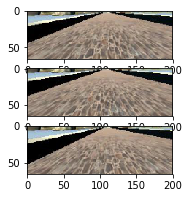

In [22]:
imgs = res_flip
print(imgs[1][0],imgs[1][1],imgs[1][2])
img1 = cv2.cvtColor(imgs[0][0], cv2.COLOR_YUV2BGR)
img2 = cv2.cvtColor(imgs[0][1], cv2.COLOR_YUV2BGR)
img3 = cv2.cvtColor(imgs[0][2], cv2.COLOR_YUV2BGR)

fig = plt.figure(figsize=(5,3))
plt.subplot(311)
plt.imshow(img1)
plt.subplot(312)
plt.imshow(img2)
plt.subplot(313)
plt.imshow(img3)
#plt.show()
plt.savefig("augment1.png")

In [36]:
from sklearn.model_selection import train_test_split
train_samples, validation_samples = train_test_split(samples, test_size = 0.2)
print(len(train_samples)*6)

61392


In [9]:
#image_name = 'recover/data/IMG/center_2017_04_22_01_13_44_108.jpg'
#cimage = cv2.imread(image_name)
#cimage = cimage[60:-25, :, :]
#cimage = cv2.resize(cimage, (200, 66), cv2.INTER_AREA)
#cimage = cv2.cvtColor(cimage, cv2.COLOR_RGB2YUV)
#plt.imshow(cv2.cvtColor(cimage, cv2.COLOR_YUV2BGR))

In [11]:
def generator(samples, batch_size = 100):
    num_samples = len(samples)
    while 1:
        sklearn.utils.shuffle(samples)
        for offset in range(0, num_samples, batch_size):
            batch_samples = samples[offset:offset+batch_size]
            images, angles = [], []
            for batch_sample in batch_samples:
                name = batch_sample[-1] + '/IMG/' + batch_sample[0].split('/')[-1]
                name_left = batch_sample[-1] + '/IMG/' + batch_sample[1].split('/')[-1]
                name_right = batch_sample[-1] + '/IMG/' + batch_sample[2].split('/')[-1]
                names = [name, name_left, name_right]
                center_angle = float(batch_sample[3])
                res = img_add(names, center_angle, 0.2, False)
                res_flip = img_add(names, center_angle, 0.2, True)
                images = images + res[0]
                angles = angles + res[1]
                images = images + res_flip[0]
                angles = angles + res_flip[1]
            X_train = np.array(images)
            y_train = np.array(angles)
            yield sklearn.utils.shuffle(X_train, y_train)

In [12]:
train_generator = generator(train_samples, batch_size = 100)
validation_generator = generator(validation_samples, batch_size = 100)

In [ ]:
model.add(Dense(1164, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu', name='FC1'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', name='FC2'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', name='FC3'))
model.add(Dense(1))

model.add(Dense(1164))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dense(1))

In [13]:
## Nvidia model

model = Sequential()
#model.add(Cropping2D(cropping=((60,25),(0,0)), input_shape = (66,200,3)))
model.add(Lambda(lambda x: x/127.5-1.0, input_shape= (66,200,3)))
model.add(Convolution2D(24, 5, 5, subsample = (2,2), border_mode ='valid', activation = 'relu'))
model.add(Convolution2D(36, 5, 5, subsample = (2,2), border_mode ='valid', activation = 'relu'))
model.add(Convolution2D(48, 5, 5, subsample = (2,2), border_mode ='valid', activation = 'relu'))
model.add(Convolution2D(64, 3, 3, subsample = (1,1), border_mode ='valid', activation = 'relu'))
model.add(Convolution2D(64, 3, 3, subsample = (1,1), border_mode ='valid', activation = 'relu'))
model.add(Flatten())
model.add(Dense(1164))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dense(1))


model.compile(loss = 'mse', optimizer = 'adam')
checkpoint = ModelCheckpoint('modelNew-{epoch:03d}.h5',monitor='val_loss',verbose=0,save_best_only=False, mode='auto')
history_object = model.fit_generator(train_generator, samples_per_epoch = 24000, validation_data = validation_generator, 
                    nb_val_samples = len(validation_samples), nb_epoch = 5, callbacks=[checkpoint])
model.save('modelNew.h5')

Epoch 1/5
24000/24000 [==============================] - 208s - loss: 0.0311 - val_loss: 0.0219

/Users/jitta/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/keras/engine/training.py:1573: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


24534/24000 [==============================] - 206s - loss: 0.0199 - val_loss: 0.0188
Epoch 4/5
24000/24000 [==============================] - 207s - loss: 0.0183 - val_loss: 0.0194

In [14]:
print(model.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 66, 200, 3)    0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 31, 98, 24)    1824        lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 14, 47, 36)    21636       convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_3 (Convolution2D)  (None, 5, 22, 48)     43248       convolution2d_2[0][0]            
___________________________________________________________________________________________

dict_keys(['val_loss', 'loss'])


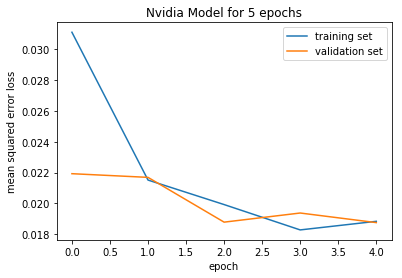

In [15]:
### print the keys contained in the history object
print(history_object.history.keys())

### plot the training and validation loss for each epoch
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('Nvidia Model for 5 epochs')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()

In [ ]:
# batch_size = 100 kinda works but: fails at bridge
# just dropout = 0.2:  fails at bridge
# dropout with more samples per epoch: fails at bridge

# Added more data recovery near  since it fails at bridge